In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.duplicated().sum()

1

In [6]:
iris.drop_duplicates(inplace=True)
iris.duplicated().sum()

0

In [8]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris.species = le.fit_transform(iris.species)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


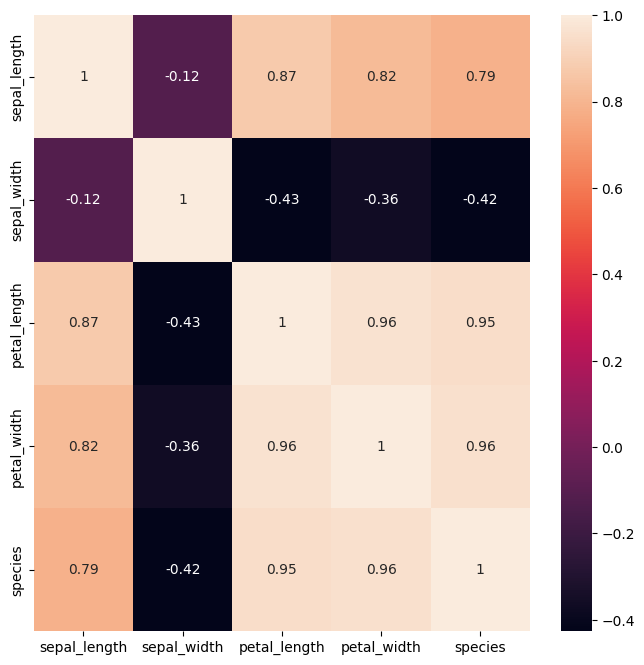

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(iris.corr(), annot = True);

C:\Users\Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


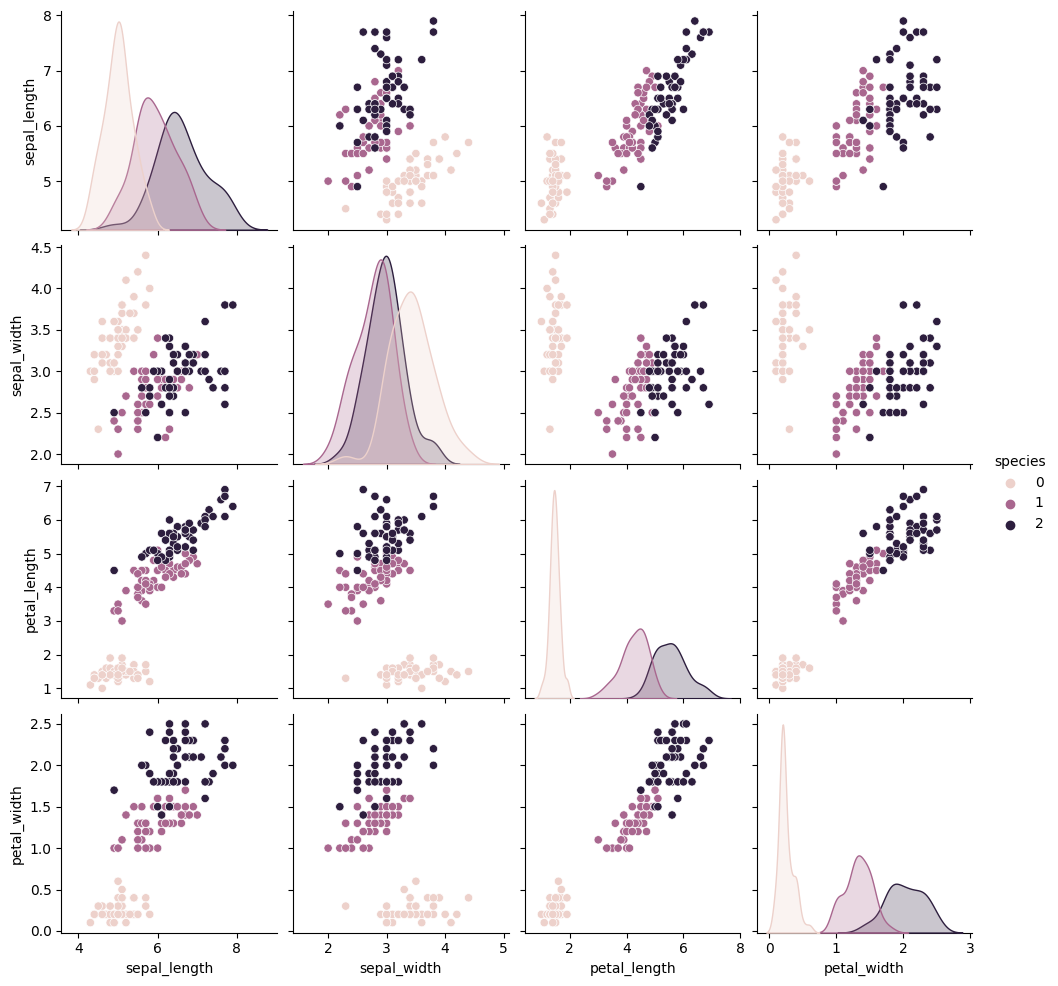

In [11]:
sns.pairplot(iris, hue="species");
plt.show()

In [12]:
X = iris.drop('species', axis = 'columns')
y = iris['species']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20,random_state = 0)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
predict = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score_NB = accuracy_score(predict, y_test)
print("Accuracy Score for Naive Bayes Model is", accuracy_score(predict,y_test))

Accuracy Score for Naive Bayes Model is 0.9333333333333333


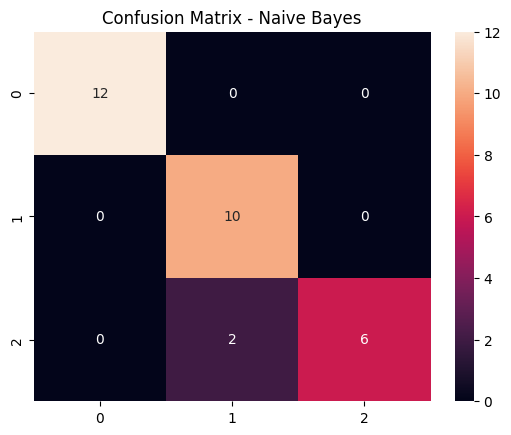

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix_NB = confusion_matrix(y_test,predict)
plt.figure(8);
plt.title('Confusion Matrix - Naive Bayes');
sns.heatmap(confusion_matrix_NB, annot = True);